In [1]:
import pandas as pd               #data_processing
import numpy as np                #linear_algebra
import matplotlib.pyplot as plt  
%matplotlib inline

PANDAS : Pandas is defined as an open-source library that provides high-performance data manipulation in Python.

NUMPY  : NumPy is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and          tools for working with these arrays. It is the fundamental package for scientific computing with Python. It is open-            source software.

PYPLOT: Pyplot is a Matplotlib module which provides a MATLAB-like interface. Matplotlib is designed to be as usable as MATLAB,         with the ability to use Python and the advantage of being free and open-source. Each pyplot function makes some change           to a figure

Pandas is built on top of the Numpy package, means Numpy is required for operating the Pandas.

# Upload Rainfall Data 

In [2]:
uploaded = pd.read_csv("rainfall_data.csv")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Date/Time" with length 78848 bytes
User uploaded file "Current rainfall (mm)" with length 78848 bytes
User uploaded file "Cumulative rainfall (mm)" with length 78848 bytes


In [3]:
df_rain = pd.read_csv("rainfall_data.csv")

HEAD : Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

In [4]:
df_rain

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm)
0,2018-12-02 18:00:00,0.0,0.0
1,2018-12-02 17:00:00,0.0,0.0
2,2018-12-02 16:00:00,0.0,0.0
3,2018-12-02 15:00:00,0.0,0.0
4,2018-12-02 14:00:00,0.0,0.0
...,...,...,...
78843,2009-12-01 04:00:00,0.0,0.2
78844,2009-12-01 03:00:00,0.0,0.2
78845,2009-12-01 02:00:00,0.0,0.2
78846,2009-12-01 01:00:00,0.0,0.2


SHAPE : we will use an attribute called shape which returns a tuple, the elements of the tuple give the lengths of the 
    corresponding array dimensions.

In [5]:
df_rain.isnull().sum()

Date/Time                   0
Current rainfall (mm)       4
Cumulative rainfall (mm)    1
dtype: int64

In [6]:
numeric_columns = ['Current rainfall (mm)', 'Cumulative rainfall (mm)']
df_filled_mean = df_rain[numeric_columns].fillna(df_rain[numeric_columns].mean())
df_rain = pd.concat([df_rain['Date/Time'], df_filled_mean], axis=1)

In [7]:
df_rain.isnull().sum()

Date/Time                   0
Current rainfall (mm)       0
Cumulative rainfall (mm)    0
dtype: int64

DESCRIBE:Pandas describe() is used to view some basic statistical details like percentile, mean, std etc. of a data 
    frame or a series of numeric values.

In [8]:
df_rain.describe()  

,Current rainfall (mm),Cumulative rainfall (mm)
count,78848.000000,78848.000000
mean,0.049206,0.586580
std,0.765277,2.770198
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


# Points are plotted Rainfall w.r.t date

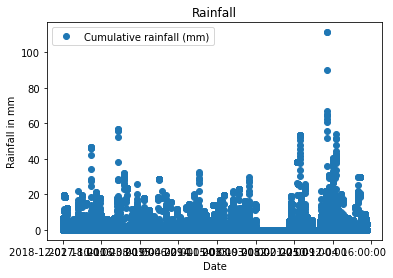

In [9]:
df_rain.plot(x='Date/Time', y='Cumulative rainfall (mm)', style='o')  

plt.title('Rainfall')  
plt.xlabel('Date')  
plt.ylabel('Rainfall in mm')  
plt.show()  

# Upload River Data

In [10]:
#from google.colab import files

#uploaded = files.upload()
uploaded = pd.read_csv("river_hourly_data.csv")

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "Date/Time" with length 78822 bytes
User uploaded file "Level (m)" with length 78822 bytes


In [11]:
df_river = pd.read_csv("river_hourly_data.csv")

In [12]:
df_river

,Date/Time,Level (m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63
...,...,...
78817,2009-12-02 04:00:00,1.39
78818,2009-12-02 03:00:00,1.39
78819,2009-12-02 02:00:00,1.40
78820,2009-12-02 01:00:00,1.40


In [13]:
df_river.isnull().sum()

Date/Time    0
Level (m)    0
dtype: int64

In [14]:
df_river.describe()  

,Level (m)
count,78822.000000
mean,1.453701
std,0.113859
min,0.000000
25%,1.400000
50%,1.450000
75%,1.500000
max,3.300000


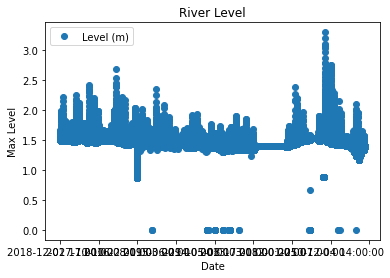

In [15]:
df_river.plot(x='Date/Time', y='Level (m)', style='o')  
plt.title('River Level')  
plt.xlabel('Date')  
plt.ylabel('Max Level')  
plt.show()  

Here, rainfall data and river data both are merged together in one file

In [16]:
#df_river["Date/Time"] = df_river["Date/Time"].str.replace("00:00", "")
df = pd.merge(df_rain, df_river, how='outer', on=['Date/Time'])
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


Here we plots points between cumulative rainfall and river water level

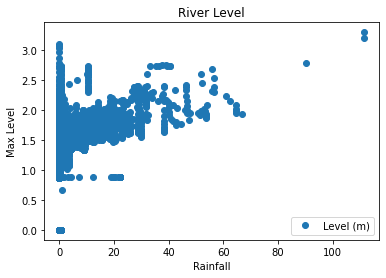

In [17]:
df.plot(x='Cumulative rainfall (mm)', y='Level (m)', style='o')  
plt.title('River Level')  
plt.xlabel('Rainfall')  
plt.ylabel('Max Level')  
plt.show()  

In [18]:
df['Cumulative rainfall (mm)'] = df['Cumulative rainfall (mm)'].fillna(0)
df['Level (m)'] = df['Level (m)'].fillna(0)

df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level (m)
0,2018-12-02 18:00:00,0.0,0.0,0.00
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


Drop is one of the main functions used to cleanse data.We can drop specified labels from rows or columns by using drop()

In [19]:
df = df.drop(columns=['Current rainfall (mm)', 'Date/Time'])
df.shape

(78850, 2)

Python iloc() function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset.

In [20]:
X = df.iloc[:, :1].values
y = df.iloc[:, 1:2].values

In [21]:
print(X)
print(y)

[[0. ]
 [0. ]
 [0. ]
 ...
 [0.2]
 [0.2]
 [0.2]]
[[0.  ]
 [1.61]
 [1.61]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


SKLEARN : scikit-learn is an open-source Python library that implements a range of machine learning, pre-processing, cross-               validation, and visualization algorithms using a unified interface.

The train_test_split function of the sklearn.model_selection package in Python splits arrays or matrices into random subsets for train and test data, respectively.

In [22]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  


In [34]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression()

In [35]:
# Assuming you have already trained the model and have X_test and y_test as your testing data

# Use the trained model to make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate the R² score for the model's predictions
accuracy = regressor.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)


Accuracy: 0.18271855243790103


In [38]:
from sklearn.metrics import r2_score

# Assuming you have trained the LinearRegression model and obtained predictions
y_pred = regressor.predict(X_test)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2)


R-squared score: 0.18271855243790103


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)


Mean Squared Error (MSE): 0.010945894529122884
Mean Absolute Error (MAE): 0.06291000110417022


If no errors are thrown - the regressor found the best fitting line! The line is defined by our features and the intercept/slope. In fact, we can inspect the intercept and slope by printing the regressor.intecept_ and regressor.coef_ attributes, respectively

In [ ]:
print(regressor.intercept_)

In [ ]:
print(regressor.coef_)  

To make predictions on the test data, we pass the X_test values to the predict() method. We can assign the results to the variable y_pred:

In [ ]:
y_pred = regressor.predict(X_test) 

 But can we trust those estimates? In the answer to that question is the reason why we split the data into train and test in the first place. Now we can predict using our test data and compare the predicted with our actual results - the ground truth results.

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

All of our errors are low - and we're missing the actual value by 0.10 at most (lower or higher), which is a pretty small range considering the data we have.

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Rainfall Vs River Level (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Rainfall Vs River Level (Testing set)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

In [ ]:
#@title Enter Rainfall amount in mm
Rainfall_Amount = [[4.555]]



In [ ]:
#@title Flood possibility
predicted_riverlevel = regressor.predict(Rainfall_Amount)
print(predicted_riverlevel)
if (predicted_riverlevel > 1.5):
  print("FLOOD")
else:
  print("No FLOOD")